In [ ]:
#import library
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#***Image process method***


In [ ]:
#method that set up image
def showImage(subplot, image, title):
    plt.subplot(subplot), plt.imshow(image)
    plt.title(title), plt.xticks([]), plt.yticks([])

  #central point input centralpoint(x,y)
  #generate all the values that around the centre point for convolution
def generateBoxPoint(boxSize, CentralPoint):
    result = []
    for j in range(CentralPoint[1]-(int(boxSize/2)),1+CentralPoint[1]+(int(boxSize/2))):
        for i in range(CentralPoint[0]-(int(boxSize/2)),1+CentralPoint[0]+(int(boxSize/2))):
            result.append([i,j])
    return result

#image in RGB
def linearFilter(image, kernel:np.array):
    result = []
    kernelSize = len(kernel)
    for j in range(int(kernelSize/2),len(image)-int(kernelSize/2)):
        newLine = [] 
        for i in range(int(kernelSize/2),len(image[0])-int(kernelSize/2)):
            RPointValue = 0
            GPointValue = 0
            BPointValue = 0
            for points in generateBoxPoint(kernelSize,[i,j]):
                ydiff = points[1] - (j - int(kernelSize/2))
                xdiff = points[0] - (i - int(kernelSize/2))
                #update all rgb value to the sum of point around multipy by the kernel
                RPointValue += image[points[1]][points[0]][0] * kernel[ydiff][xdiff]
                GPointValue += image[points[1]][points[0]][1] * kernel[ydiff][xdiff]
                BPointValue += image[points[1]][points[0]][2] * kernel[ydiff][xdiff]
                #print("points: ",points," ydiff: ",ydiff," xdiff: ",xdiff," image point: ",image[j][i][0])
            newLine.append(np.array([int(RPointValue),int(GPointValue),int(BPointValue)]))
        result.append(np.array(newLine))
    
    result =  np.array(result,dtype=np.uint8)#result a numpy array with format unit8 inorder to match we input img format

    return np.pad(result,[(int(kernelSize/2),int(kernelSize/2)), (int(kernelSize/2),int(kernelSize/2)), (0,0)], mode='constant')


#***Denoising***
3*3 Gaussian

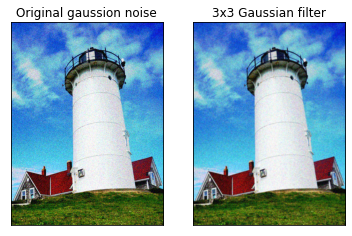

In [ ]:
gaussianNoisePath = "/content/drive/My Drive/ecse415/assignmentOne/images/gaussian_lighthouse.png"

imgGaussianNoise = cv.imread(gaussianNoisePath)
#use the gaussianBlur method build in the opencv
gaussianDenisingOut = cv.GaussianBlur(imgGaussianNoise,(3,3),2**0.5)
imgGaussianNoise = cv.cvtColor(imgGaussianNoise, cv.COLOR_BGR2RGB)
gaussianDenisingOut = cv.cvtColor(gaussianDenisingOut, cv.COLOR_BGR2RGB)
showImage(121,imgGaussianNoise,"Original gaussion noise")
showImage(122,gaussianDenisingOut,"3x3 Gaussian filter")

gaussianDenisingOut = cv.cvtColor(gaussianDenisingOut, cv.COLOR_RGB2BGR)
#store the output image as a file
cv.imwrite("/content/drive/My Drive/ecse415/assignmentOne/images/11.png", gaussianDenisingOut)

plt.show()

3*3 box filter

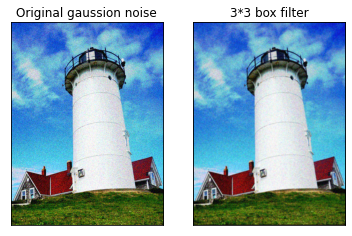

In [ ]:
#set the box the calculate the average
kBox = np.array([[1/9,1/9,1/9],
        [1/9,1/9,1/9],
        [1/9,1/9,1/9]])
imgBox = linearFilter(imgGaussianNoise,kBox)

showImage(121,imgGaussianNoise,"Original gaussion noise")
showImage(122,imgBox,"3*3 box filter")

imgBox = cv.cvtColor(imgBox, cv.COLOR_RGB2BGR)
#store the output image as a file
cv.imwrite("/content/drive/My Drive/ecse415/assignmentOne/images/12.png", imgBox)

plt.show()

Compare Peak-Signal-to-Noise-Ratio

In [ ]:
originalImage = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/lighthouse.png")
originalImage = cv.cvtColor(originalImage, cv.COLOR_BGR2RGB)
gaussianFiltered = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/11.png")
gaussianFiltered = cv.cvtColor(gaussianFiltered, cv.COLOR_BGR2RGB)
boxFiltered = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/12.png")
boxFiltered = cv.cvtColor(boxFiltered, cv.COLOR_BGR2RGB)

# print(originalImage.shape)
# print(gaussianFiltered.shape)
# print(boxFiltered.shape)
print("PSNR of Gaussian filtered image: ",cv.PSNR(originalImage, gaussianFiltered))
print("PSNR of box filtered image: ",cv.PSNR(originalImage, boxFiltered))


PSNR of Gaussian filtered image:  26.59515732381668
PSNR of box filtered image:  23.56997811586117


Gaussian filter(saltandpepper)

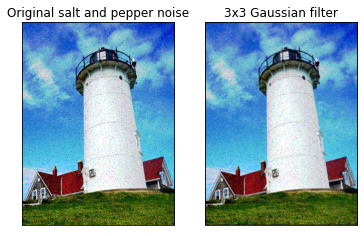

In [ ]:
saltAndPepper = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/saltandpepper_lighthouse.png")
saltAndPepper = cv.cvtColor(saltAndPepper, cv.COLOR_BGR2RGB)
GR = 1/16
#gaussian filter box, time 1/16 in order make the sum equal to 1
GaussianBox = np.array([[1*GR,2*GR,1*GR],
               [2*GR,4*GR,2*GR],
               [1*GR,2*GR,1*GR]])
GaussianBoxOut = linearFilter(saltAndPepper,GaussianBox)

showImage(121,saltAndPepper,"Original salt and pepper noise")
showImage(122,GaussianBoxOut,"3x3 Gaussian filter")

GaussianBoxOut = cv.cvtColor(GaussianBoxOut, cv.COLOR_RGB2BGR)
cv.imwrite("/content/drive/My Drive/ecse415/assignmentOne/images/14.png", GaussianBoxOut)

plt.show()


median filter(saltandpepper)

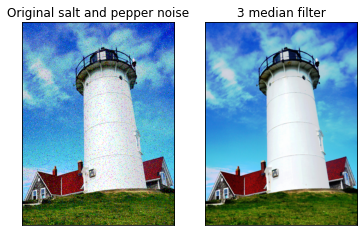

In [ ]:
medianOut = cv.medianBlur(saltAndPepper, 3)
showImage(121,saltAndPepper,"Original salt and pepper noise")
showImage(122,medianOut,"3 median filter")
#call the median filter method build in cv
medianOut = cv.cvtColor(medianOut, cv.COLOR_RGB2BGR)
#save the image into the file
cv.imwrite("/content/drive/My Drive/ecse415/assignmentOne/images/15.png", medianOut)
plt.show()

Compare Peak-Signal-to-Noise-Ratio

In [ ]:
originalImage = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/lighthouse.png")
originalImage = cv.cvtColor(originalImage, cv.COLOR_BGR2RGB)
gaussianFiltered = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/14.png")
gaussianFiltered = cv.cvtColor(gaussianFiltered, cv.COLOR_BGR2RGB)
medianFiltered = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/15.png")
medianFiltered = cv.cvtColor(boxFiltered, cv.COLOR_BGR2RGB)
print("PSNR of Gaussian filtered image: ",cv.PSNR(originalImage, gaussianFiltered))
print("PSNR of median filtered image: ",cv.PSNR(originalImage, medianFiltered))
print("meidan filter has better performance the gaussian filter")


PSNR of Gaussian filtered image:  22.5360313054206
PSNR of median filtered image:  9.232934323321462
meidan filter has better performance the gaussian filter


#**Canny Edge Detection**

candy edge detection:
1. apply gaussian Filter to the image pixles to smooth the image, filter out high frequency pixles
2. compute x component gradient and y component gradient.and calculate gradient angles, in order to enhance edges pixle in both vertical diraction and horizontal diraction
3. use Non-maximum suppression to eliminate the pixles that not concidered as edge
4. after non-maxinum suppression we might lose some detiled edge, therefore we use Hysteresis Thresholding, useing the maximum threhold and mininum threshold to decide whether a pixle is part of the edge


In [ ]:
#intilize all the hyper-index
K = [5,9,13]
L = [10,30,50]
U = [100,150,200]
dolphinImg = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/dolphin.jpg")
counter = 0
images = []
titles = []
#user for loop to go through all the indexs
for k in K:
  for l in L:
    for u in U:
      counter += 1
      dolphinImgFil = cv.GaussianBlur(dolphinImg,(k,k),2**0.5)
      dolphinEdge = cv.Canny(dolphinImgFil,l,u)
      sublot = int("39"+ str(counter))
      dolphinEdge = dolphinEdge.astype('uint8')
      #dolphinEdge = cv.cvtColor(dolphinEdge, cv.COLOR_BGR2RGB)
      images.append(dolphinEdge)#store all the images input list 
      titles.append(str(k)+','+str(l)+","+str(u))
#helper method that helps to show the image
def showEdge(i,j,k,l):
  plt.figure(figsize=(12,12))
  plt.subplot(j,k,l), plt.imshow(images[i], cmap = 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

(None, None, None)

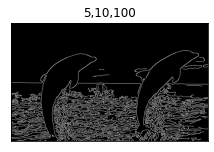

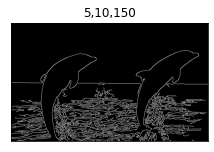

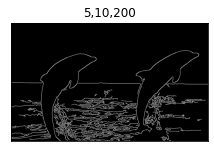

In [ ]:
showEdge(0,1,3,1),showEdge(1,1,3,2),showEdge(2,1,3,3)

(None, None, None)

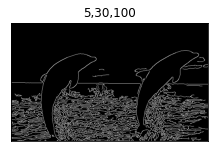

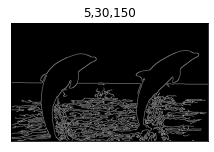

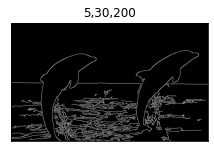

In [ ]:
showEdge(3,1,3,1),showEdge(4,1,3,2),showEdge(5,1,3,3)

(None, None, None)

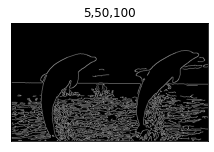

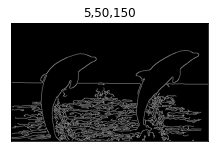

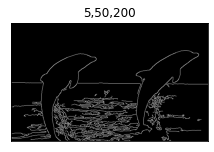

In [ ]:
showEdge(6,1,3,1),showEdge(7,1,3,2),showEdge(8,1,3,3)

(None, None, None)

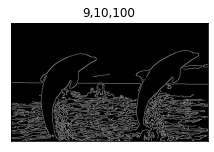

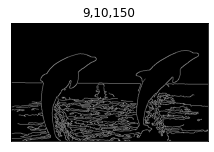

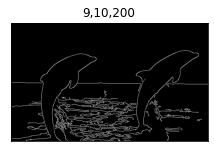

In [ ]:
showEdge(9,1,3,1),showEdge(10,1,3,2),showEdge(11,1,3,3)

(None, None, None)

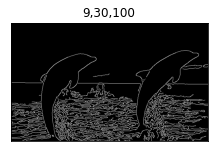

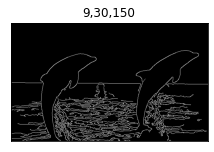

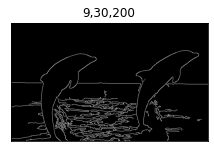

In [ ]:
showEdge(12,1,3,1),showEdge(13,1,3,2),showEdge(14,1,3,3)

(None, None, None)

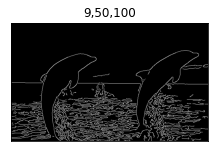

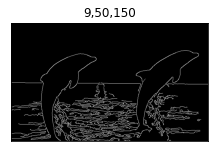

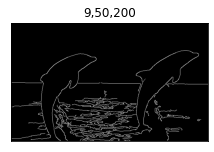

In [ ]:
showEdge(15,1,3,1),showEdge(16,1,3,2),showEdge(17,1,3,3)

(None, None, None)

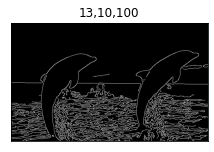

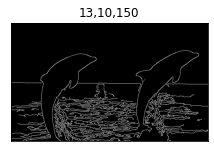

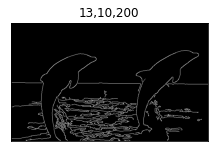

In [ ]:
showEdge(18,1,3,1),showEdge(19,1,3,2),showEdge(20,1,3,3)

(None, None, None)

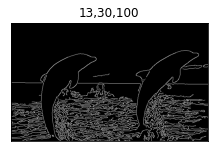

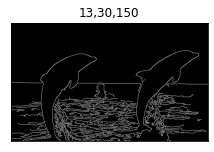

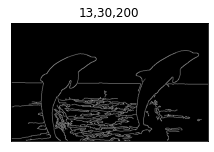

In [ ]:
showEdge(21,1,3,1),showEdge(22,1,3,2),showEdge(23,1,3,3)

(None, None, None)

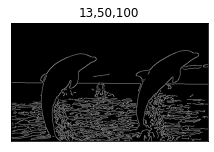

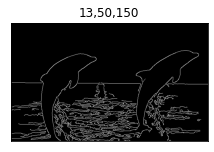

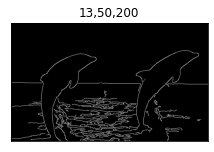

In [ ]:
showEdge(24,1,3,1),showEdge(25,1,3,2),showEdge(26,1,3,3)

As we can observe from the result, when the lower threshold and upper threshold reminds the same, smaller the gaussian size, more edges will be showing, due to the image is less smooth when the guassian size is smaller. As well as, smaller the lower threshold and upper threshold, the more detiled edges will be showing. Lowering the lower threshold results in more connected detail edges and lowering the upper threshold causes discontinuous detail edges. increasing the guassian size makes some edges disappear completely

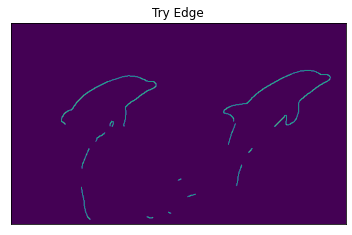

In [ ]:
k = 17
l = 300
u = 400
dolphinImgFil = cv.GaussianBlur(dolphinImg,(k,k),2**0.5)
dolphinEdge = cv.Canny(dolphinImgFil,l,u)
sublot = int("39"+ str(counter))
dolphinEdge = np.uint8(dolphinEdge)
#dolphinEdge = cv.cvtColor(dolphinEdge, cv.COLOR_BGR2RGB)
showImage(111,dolphinEdge,"Try Edge")

after experiment we find that the hyper=parameters(K=17,l=300,u=400) only detect the edge of dolphin

#**Harris Corner Detection**

In [ ]:
#take gray image as input
#2d array convolution, only 2 axi since the image is gary
def convolution(img,kmap):
  y = img.shape[0]
  x = img.shape[1]
  x = 1+x - kmap.shape[0]
  y = 1+y - kmap.shape[0]
  result = np.zeros((y,x))
  for i in range(y):
    for j in range(x):
      result[i][j] = np.sum(img[i:i+kmap.shape[0],j:j+kmap.shape[0]]*kmap)
  return result
#use kernel to find the gradient alone the x direction
def gradientX(img):
  k = [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
  k = np.array(k,np.float32)
  result = convolution(img,k)
  #showImage(111,result,"corner detactor")
  return result
#use kernel to find the gradient alone the y direction
def gradientY(img):
  k = [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
  k = np.array(k,np.float32)
  result = convolution(img,k)
  #showImage(111,result,"corner detactor")
  return result
#apply gausiian filter to the squate output
def gaussianToOutPut(Ix, Iy,size):
  GR = 1/16
  k = np.array([[1*GR,2*GR,1*GR],
               [2*GR,4*GR,2*GR],
               [1*GR,2*GR,1*GR]])
  Ixx = convolution(Ix**2,k)
  Ixy = convolution(Iy*Ix,k)
  Iyy = convolution(Iy**2,k)
  return [Ixx,Ixy,Iyy]
#fine the harrisResponse use the formula
def HarrisResponse(k,Ixx,Iyy,Ixy):
  dA = Ixx * Iyy - Ixy**2
  tA = Ixx + Iyy
  return dA - k*tA**2
#ref: NMS inspired by(https://muthu.co/harris-corner-detector-implementation-in-python/)
def NMS(harrisResponse,img):
  imgCopy = np.copy(img)
  for rowIndex, response in enumerate(harrisResponse):
    for colIndex, r in enumerate(response):
      if r <= 0:#when r less or equals to zero, it means the pixels are part of edge or flat
        imgCopy[rowIndex,colIndex] = 0#set the pixel value to zero if it's not part of corner point
        #print("img:", img)
  return imgCopy

#combine the functions together to impliment the corner detectir method
def cornerDetector(img):
  Ix = gradientX(img)
  Iy = gradientY(img)
  output = gaussianToOutPut(Ix,Iy,5)
  result = HarrisResponse(0.05,output[0],output[2],output[1])
  result = NMS(result,result)
  #print("result: ",result)
  return result

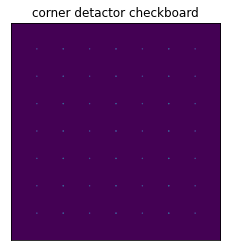

In [ ]:
checkBoard = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/checkerboard.png")
checkBoard = cv.cvtColor(np.float32(checkBoard), cv.COLOR_BGR2GRAY)
foo = cornerDetector(checkBoard)
#checkBoard  = cv.cvtColor(checkBoard , cv.COLOR_BGR2RGB)
showImage(111,foo,"corner detactor checkboard")

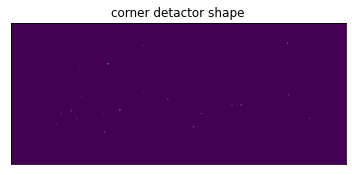

In [ ]:
shapes = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/shapes.png")
shapes = cv.cvtColor(np.float32(shapes), cv.COLOR_BGR2GRAY)
foo = cornerDetector(shapes)
#checkBoard  = cv.cvtColor(checkBoard , cv.COLOR_BGR2RGB)
showImage(111,foo,"corner detactor shape")

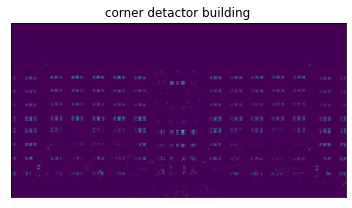

In [ ]:
buiding = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/CLT_Office.jpg")
buiding = cv.cvtColor(np.float32(buiding), cv.COLOR_BGR2GRAY)
foo = cornerDetector(buiding)
#checkBoard  = cv.cvtColor(checkBoard , cv.COLOR_BGR2RGB)
showImage(111,foo,"corner detactor building")

  in the non maximum suppression method, the program detect whether a piont is corner pixel by comparing it's r, if r is less or equal to zero it mean it's not a corner pixel(see the picture below).
  Through the observation of the results of the graph I found that when the value of k is greater when the corner points shown is not obvious, and k value is less than 0.005 when the impact of the result is very small

ref: https://muthu.co/harris-corner-detector-implementation-in-python/


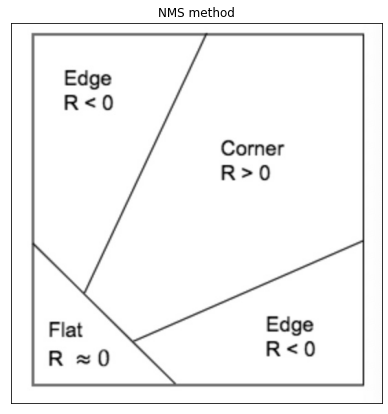

In [ ]:
pic = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/corner.jpeg")
pic = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))
showImage(111, pic, "NMS method")
print("ref: https://muthu.co/harris-corner-detector-implementation-in-python/")

#**Image Stitching**

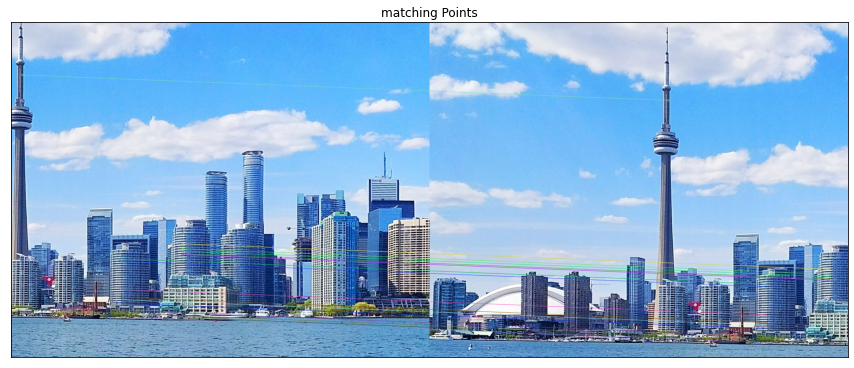

In [ ]:
#Ref: ecse 415 tutorial 4(https://mycourses2.mcgill.ca/d2l/le/lessons/556969/topics/6277330)
TorontoOne = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/1Toronto.jpg")
TorontoTwo = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/2Toronto.jpg")
TorontoOne = cv.cvtColor(TorontoOne, cv.COLOR_BGR2RGB)
TorontoTwo = cv.cvtColor(TorontoTwo, cv.COLOR_BGR2RGB)
# Compute keypoints and descriptors
sift_obj = cv.xfeatures2d.SIFT_create()
keypoints_one, descriptors_one = sift_obj.detectAndCompute(TorontoOne, None)
keypoints_two, descriptors_two = sift_obj.detectAndCompute(TorontoTwo, None)
# initilze BFMatcher
bf = cv.BFMatcher()
# Match descriptors.
matches = bf.match(descriptors_two,descriptors_one)
matches = sorted(matches, key = lambda x:x.distance)
# Draw keypoints and match the similar features and disaplay 20 best paris
imgmatch = cv.drawMatches(TorontoTwo,keypoints_two,TorontoOne,keypoints_one, matches[:20], None, flags=2)

plt.figure(figsize=(15,15))
showImage(111, imgmatch, "matching Points")

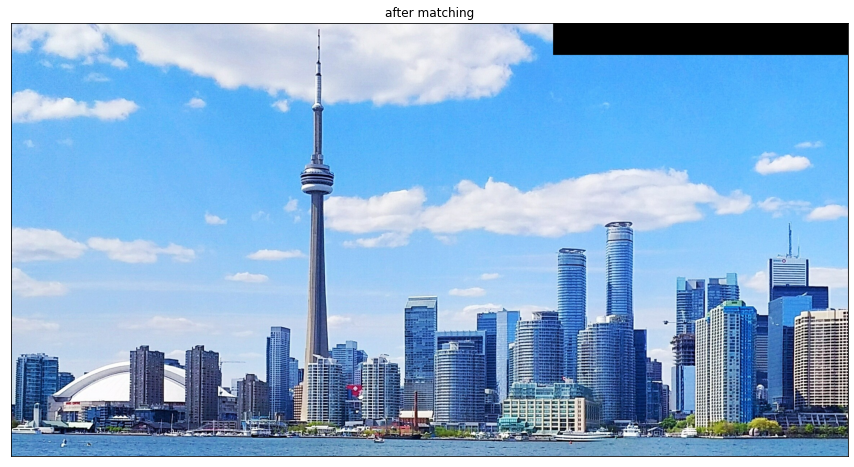

In [ ]:
#Ref: ecse 415 tutorial 4(https://mycourses2.mcgill.ca/d2l/le/lessons/556969/topics/6277330)
#Stitch transformed 1Toronto and the original 2Toronto together 
GoodMatches = []
#find the good matches that distance less then 1000
for i, m in enumerate(matches):
    if m.distance < 1000:
        GoodMatches.append((m.trainIdx, m.queryIdx))

#
mpr = np.float32([keypoints_two[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_one[i].pt for (i, __) in GoodMatches])

H, __ = cv.findHomography(mpr, mpl, cv.RANSAC, 4)
TorontoOneTwo = cv.warpPerspective(TorontoTwo, H, (TorontoTwo.shape[1]+TorontoOne.shape[1],TorontoTwo.shape[0]))
TorontoOneTwo[:,:TorontoOne.shape[1],:] = TorontoOne

#remove all the column that are zeros, meaningless pixcels after reshape the picture to match another
column_sums = TorontoOneTwo.sum(axis=2)
column_sums = column_sums.sum(axis=0)
counter =0
for i in range(len(column_sums)):
  j = len(column_sums)-1-i
  if(column_sums[j] == 0):
    counter +=1
  else:
    break
for _ in range(counter):
  TorontoOneTwo = np.delete(TorontoOneTwo,-1,1)

plt.figure(figsize=(15,15))
showImage(111, TorontoOneTwo, "after matching")

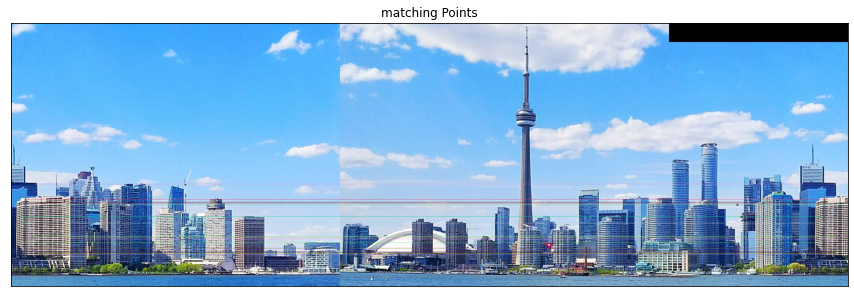

In [ ]:
#repeat the previous procidure for third picture
TorontoThree = cv.imread("/content/drive/My Drive/ecse415/assignmentOne/images/3Toronto.jpg")
TorontoThree = cv.cvtColor(TorontoThree, cv.COLOR_BGR2RGB)
sift_obj = cv.xfeatures2d.SIFT_create()
keypoints_one, descriptors_one = sift_obj.detectAndCompute(TorontoOneTwo, None)
keypoints_two, descriptors_two = sift_obj.detectAndCompute(TorontoThree, None)
bf = cv.BFMatcher()
matches = bf.match(descriptors_two,descriptors_one)
matches = sorted(matches, key = lambda x:x.distance)
imgmatch = cv.drawMatches(TorontoThree,keypoints_two,TorontoOneTwo,keypoints_one, matches[:20], None, flags=2)

plt.figure(figsize=(15,15))
showImage(111, imgmatch, "matching Points")

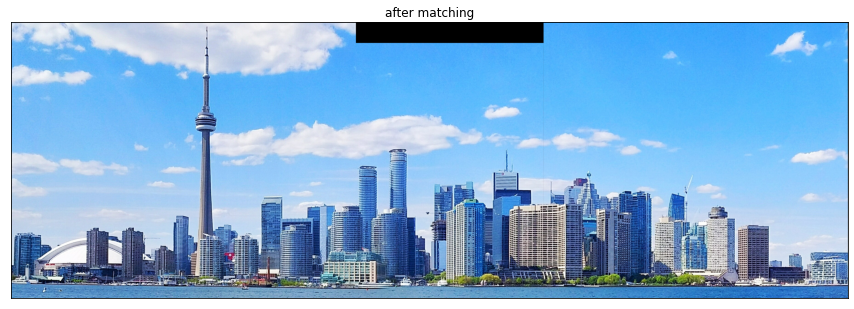

In [ ]:
#Ref: ecse 415 tutorial 4(https://mycourses2.mcgill.ca/d2l/le/lessons/556969/topics/6277330)
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 1000:
        GoodMatches.append((m.trainIdx, m.queryIdx))

mpr = np.float32([keypoints_two[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_one[i].pt for (i, __) in GoodMatches])

H, __ = cv.findHomography(mpr, mpl, cv.RANSAC, 4)
result = cv.warpPerspective(TorontoThree, H, (TorontoThree.shape[1]+TorontoOneTwo.shape[1],TorontoThree.shape[0]))
result[:,:TorontoOneTwo.shape[1],:] = TorontoOneTwo

column_sums = result.sum(axis=2)
column_sums = column_sums.sum(axis=0)
counter =0
for i in range(len(column_sums)):
  j = len(column_sums)-1-i
  if(column_sums[j] == 0):
    counter +=1
  else:
    break
for _ in range(counter):
  result = np.delete(result,-1,1)

plt.figure(figsize=(15,15))
showImage(111, result, "after matching")